13307130167 刘阳

In [1]:
%matplotlib inline
import nltk

### Assignment 1: 处理布朗语料库

#### 1.1 哪些名词常以它们的复数形式而不是它们的单数形式出现？

In [2]:
brown_tagged = nltk.corpus.brown.tagged_words(tagset='universal')
noun = [w for (w, t) in brown_tagged if t == 'NOUN']
noun_fd = nltk.FreqDist(noun)
result = [n for (n, cnt) in noun_fd.iteritems() if cnt < noun_fd.get(n+'s', 0)]

# to see if the 'result' is right
for r in result[:3]:
    print('{0}:\tplural count:{1}\tsingular count:{2}\n'.format(r, noun_fd[r+'s'], noun_fd[r]))

appropriation:	plural count:8	singular count:4

centimeter:	plural count:8	singular count:2

projection:	plural count:10	singular count:9



In [3]:
result

[u'appropriation',
 u'centimeter',
 u'projection',
 u'Lo',
 u'absolute',
 u'libertie',
 u'ligand',
 u'fin',
 u'outburst',
 u'critter',
 u'friend',
 u'singer',
 u'plate',
 u'Snake',
 u'plaque',
 u'duffer',
 u'billboard',
 u'binder',
 u'fabric',
 u'passenger',
 u'variable',
 u'crater',
 u'minute',
 u'emotion',
 u'saving',
 u'periodical',
 u'wandering',
 u'allowance',
 u'advertisement',
 u'being',
 u'pillar',
 u'Example',
 u'bubble',
 u'norm',
 u'follower',
 u'colleague',
 u'gadget',
 u'Banker',
 u'Han',
 u'Hay',
 u'vow',
 u'contributor',
 u'sock',
 u'revision',
 u'maker',
 u'customer',
 u'bronchiole',
 u'antagonist',
 u'allusion',
 u'undergraduate',
 u'feather',
 u'pier',
 u'adverb',
 u'progression',
 u'investigator',
 u'Game',
 u'barrier',
 u'Artist',
 u'bracket',
 u'ellipsoid',
 u'Wing',
 u'peer',
 u'improvisation',
 u'interval',
 u'Princes',
 u'gut',
 u'Height',
 u'purge',
 u'product',
 u'Ship',
 u'furnishing',
 u'Kroger',
 u'gasp',
 u'recruit',
 u'Settlement',
 u'Cossack',
 u'stair',

#### 1.2哪个词的不同词性标记数目最多？

In [4]:
cfd = nltk.ConditionalFreqDist(brown_tagged)
max(cfd.items(), key=lambda (k, v): len(v))

(u'down',
 FreqDist({u'ADJ': 1, u'ADP': 190, u'NOUN': 1, u'PRT': 694, u'VERB': 2}))

'down'的不同词性标记数目最多

#### 1.3按频率递减的顺序列出标记。前20个最频繁的词性标记代表什么？

In [5]:
tag_fd = nltk.FreqDist(t for (w, t) in brown_tagged)
tag_fd.most_common(20)

[(u'NOUN', 275558),
 (u'VERB', 182750),
 (u'.', 147565),
 (u'ADP', 144766),
 (u'DET', 137019),
 (u'ADJ', 83721),
 (u'ADV', 56239),
 (u'PRON', 49334),
 (u'CONJ', 38151),
 (u'PRT', 29829),
 (u'NUM', 14874),
 (u'X', 1386)]

所有词性标记总数都没有达到20

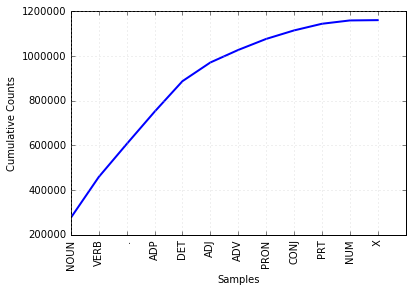

In [6]:
tag_fd.plot(cumulative=True)

从累计分布图中，可以看到前5个标记就占了 2/3 还要多

#### 1.4名词后面最常见的是哪些词性标记？这些标记代表什么？

In [7]:
word_tag_pairs = nltk.bigrams(brown_tagged)
noun_followers = [b[1] for (a, b) in word_tag_pairs if a[1] == 'NOUN']
fdist = nltk.FreqDist(noun_followers)
[t for (t, cnt) in fdist.most_common()]

[u'.',
 u'ADP',
 u'VERB',
 u'NOUN',
 u'CONJ',
 u'ADV',
 u'PRON',
 u'PRT',
 u'DET',
 u'ADJ',
 u'NUM',
 u'X']

最常见的是标点，介词和动词。  
可见名字的功能主要是：主谓宾结构中的宾语，常出现在句末，动词和介词之后作为宾语。

### 2.Unigram标注器的性能曲线

当训练数据量变化时，unigram标注器的性能曲线

In [8]:
sents = nltk.corpus.brown.tagged_sents(categories='news')

In [9]:
def performance(percent, train_data):
    print('start training on {0}% data'.format(percent))
    baseline_tagger = nltk.UnigramTagger(train=train_data, backoff=nltk.DefaultTagger('NOUN'))
    r = baseline_tagger.evaluate(sents)
    print('percent: {0}\tperformance: {1}\n'.format(percent, r))
    return r

In [10]:
def display():
    import pylab
    percent = range(10, 101, 10)
    l = len(sents)
    perfs = [performance(per, sents[:int(l * per / 100.)]) for per in percent]
    pylab.plot(percent, perfs, '-bo')
    pylab.title('Unigram Tagger Performance with Varying Training Data Size')
    pylab.xlabel('Training Data Percentage')
    pylab.ylabel('Performance')
    pylab.show()

start training on 10% data
percent: 10	performance: 0.679793941564

start training on 20% data
percent: 20	performance: 0.743192712373

start training on 30% data
percent: 30	performance: 0.789565805438

start training on 40% data
percent: 40	performance: 0.823656940549

start training on 50% data
percent: 50	performance: 0.851164548402

start training on 60% data
percent: 60	performance: 0.874007995704

start training on 70% data
percent: 70	performance: 0.892624858285

start training on 80% data
percent: 80	performance: 0.908337808541

start training on 90% data
percent: 90	performance: 0.923056268274

start training on 100% data
percent: 100	performance: 0.934900650397



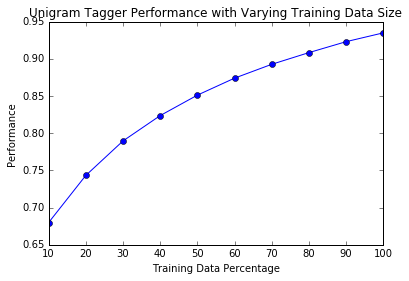

In [11]:
display()